## Gözlemlerin birbirine olan benzerlikleri üzerinden tahmin yapılır

### Sınıflandırma ve regresyon problemleri için kullanılabilir

### Büyük veri setlerinde performansı iyi olmayabilir

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor

In [4]:
from warnings import filterwarnings
filterwarnings("ignore")

# KNN

In [2]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


### Model

In [61]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [62]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [15]:
knn_model.n_neighbors

5

In [16]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'p',
 'predict',
 'radius',
 'score',
 'set_params',
 'weights']

In [17]:
knn_model.predict(X_test)[:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [40]:
y_predict = knn_model.predict(X_test)
y_predict

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ,  325.5   ,
        216.5   ,  101.5   ,  982.    ,  886.6666,  590.    ,  901.6666,
        831.6666,  157.5   ,  393.    , 1005.    ,  735.5   ,   97.    ,
        884.4   ,  302.    ,  450.    ,  817.6666,  832.6666,  392.3334,
        528.    ,   81.6   ,  735.    ,  470.    ,  722.5   ,  101.    ,
         90.5   ,   74.6   ,  748.3334,  217.    ,  280.5334, 1044.5   ,
        955.    ,  232.    ,   78.6   ,  529.    ,   77.6   ,  106.5   ,
        516.6666,  593.6666, 1005.    ,  649.1666,  715.    ,  101.5   ,
        134.5   ,  810.    ,  743.    ,  521.3334,  664.3334,  195.    ,
        102.4   ,  728.5   ,  488.    ,  962.5   ,  230.8334, 1040.    ,
        885.    ,  542.    ,  720.4   ,  571.    ,  735.    ,   81.6   ])

In [19]:
np.sqrt(mean_squared_error(y_test,y_predict))

426.6570764525201

### KNN Tuning

In [24]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [36]:
#GridSearchCV
knn_params = {"n_neighbors":np.arange(1,30,1)}

In [34]:
knn_model = KNeighborsRegressor()

In [41]:
knn_cv_model = GridSearchCV(knn_model,knn_params,cv=10).fit(X_train,y_train)
knn_cv_model.best_params_

{'n_neighbors': 8}

In [42]:
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train)

In [43]:
knn_tuned

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [44]:
y_predict = knn_tuned.predict(X_test)
y_predict

array([ 624.583375,  812.083375,  846.25    ,  155.3125  ,  850.      ,
        310.9375  ,  215.3125  ,  125.5625  ,  751.875   ,  981.25    ,
        634.0625  ,  878.541625,  963.541625,  155.3125  ,  390.625   ,
        850.      ,  765.9375  ,   93.4375  ,  894.416625,  313.75    ,
        609.583375,  704.166625,  702.5     ,  481.145875,  469.0625  ,
         80.375   ,  915.696375,  418.75    ,  574.6875  ,   95.      ,
         92.1875  ,   73.8125  ,  638.333375,  229.375   ,  263.458375,
       1204.446375,  981.25    ,  230.625   ,   75.6875  ,  633.75    ,
         77.875   ,  115.5625  ,  660.416625,  565.729125,  861.875   ,
        685.9375  ,  850.      ,  107.8125  ,  155.3125  ,  704.375   ,
        706.25    ,  699.583375,  713.645875,  197.5     ,  111.5     ,
        738.4375  ,  691.666625,  843.229125,  188.270875,  987.5     ,
        981.25    ,  505.      ,  840.875   ,  566.875   ,  787.5     ,
         86.625   ])

In [45]:
np.sqrt(mean_squared_error(y_test,y_predict))

413.7094731463598

# Destek Vektör Regresyonu (Support Vector Reg.)

### Aykırı gözlemler doğrunun eğimini belirlemede büyük rol oynar

In [33]:
from sklearn.svm import SVR
svr_model = SVR("linear").fit(X_train,y_train) # linear or rbf

In [17]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_predict = svr_model.predict(X_test)

In [32]:
np.sqrt(mean_squared_error(y_test,y_predict))

370.04084185624924

## Tuning

In [51]:
svr_params = {"C":np.linspace(0.1,1,5)}
svr_params

{'C': array([0.1  , 0.325, 0.55 , 0.775, 1.   ])}

In [52]:
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=3,n_jobs=-1).fit(X_train,y_train)

In [53]:
svr_cv_model.best_params_

{'C': 0.325}

In [54]:
svr_model = SVR("linear",C=0.32).fit(X_train,y_train)
y_predict = svr_model.predict(X_test)

In [55]:
np.sqrt(mean_squared_error(y_test,y_predict))

367.54375059615194

# Yapay Sinir Ağları

#### Standartlaştırma

In [76]:
from sklearn.neural_network import MLPRegressor
scaler = StandardScaler()

In [91]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [92]:
mlp_model = MLPRegressor().fit(X_train_scaled,y_train)

In [95]:
y_p = mlp_model.predict(X_test_scaled)
mlp_model.predict(X_test_scaled)[:5]

array([20.05065837, 38.29865913, 64.54434114, 13.85892581, 25.76382819])

In [94]:
# İlkel hata
np.sqrt(mean_squared_error(y_test,y_p))

659.4903897674508

## Tuning

In [112]:
mlp_params = {"alpha":[0.1,0.2,0.01,0.02,0.001],
             "hidden_layer_sizes":[(10,20),(5,5),(100,100)]}

In [121]:
mlp_cv_model=GridSearchCV(mlp_model,mlp_params,cv=5,verbose=2,n_jobs=-1 ).fit(X_train_scaled,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.9s finished


In [122]:
mlp_cv_model.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (100, 100)}

In [123]:
mlp_tuned = MLPRegressor(alpha=0.01,hidden_layer_sizes = (100,100)).fit(X_train_scaled,y_train)
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

354.0720267979837

# Cart (Classification and regression tree)

In [63]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)
cart_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [52]:
cart_model.predict(X_test)[:5]

array([ 705.55937931, 1266.97166667,  705.55937931,  214.33895506,
        705.55937931])

In [64]:
np.sqrt(mean_squared_error(y_test,cart_model.predict(X_test)))

542.5302712736195

In [54]:
cart_params = {
    "max_depth":[2,3,4,5,10,20],
    "min_samples_split":[2,5,10,20,40,100]
}


In [57]:
cart_model = DecisionTreeRegressor()
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

C:\Users\ardaa_iyfsapc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [58]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 40}

In [61]:
cart_tuned = DecisionTreeRegressor(max_depth=5,min_samples_split=40).fit(X_train,y_train)

In [62]:
np.sqrt(mean_squared_error(y_test,cart_tuned.predict(X_test)))

366.2474947103212

# Random Forests

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=90).fit(X_train,y_train)

C:\Users\ardaa_iyfsapc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [28]:
np.sqrt(mean_squared_error(y_test,rf_model.predict(X_test)))

317.46768571107884

### Tuning

In [24]:
rf_params = {
    "max_depth":[2,5,10],
    "max_features":[2,5,10],
    "n_estimators":[200,500,1000,2000],
    "min_samples_split":[2,10,100],
}
rf_params

SyntaxError: invalid syntax (<ipython-input-24-964a7312b5c0>, line 6)

In [14]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.9min finished
C:\Users\ardaa_iyfsapc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [15]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [29]:
rf_tuned = RandomForestRegressor(random_state=90,max_depth=10,max_features=2,min_samples_split=2,n_estimators=1000).fit(X_train,y_train)

In [30]:
np.sqrt(mean_squared_error(y_test,rf_tuned.predict(X_test)))

345.4518390920363

## Değişken Önem Düzeyi

In [31]:
Importance = pd.DataFrame({
    "Importance":rf_tuned.feature_importances_*100
},
    index=X_train.columns
)

In [35]:
Importance.sort_values(by="Importance",axis=0,ascending=False)

,Importance
CAtBat,10.144562
CHits,9.516567
CRBI,9.102976
CRuns,8.935374
CWalks,8.259826
CHmRun,7.303784
Years,6.110100
Hits,6.020405
Walks,5.527785
RBI,5.481151


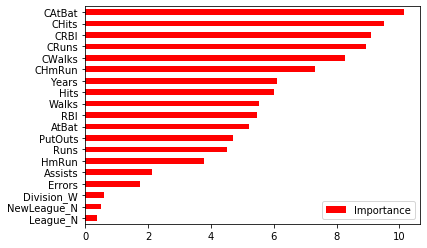

In [33]:
Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="r")

# GBM

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [7]:
gbm_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
np.sqrt(mean_squared_error(y_test,gbm_model.predict(X_test)))

354.6439004977492

In [21]:
gbm_params = {
    "learning_rate":[0.001,0.1,0.01,0.5],
    "max_depth":[3,5,10],
    "n_estimators":[100,250,500],
    "subsample":[0.5,0.7,1],
    "loss":["ls","lad","quantile"]
}

In [22]:
gbm_cv_model = GridSearchCV(gbm_model,gbm_params,cv=5,verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 686 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1051 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1496 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  3.2min finished
C:\Users\ardaa_iyfsapc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 5,
 'n_estimators': 500,
 'subsample': 1}

In [24]:
gbm_model = GradientBoostingRegressor(loss="lad",learning_rate=0.1,max_depth=3,n_estimators=500,subsample=0.7).fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test,gbm_model.predict(X_test)))

320.6732558839615

# GBoost

In [1]:
!pip install xgboost

In [2]:
from xgboost import XGBRegressor 

In [5]:
xgb = XGBRegressor().fit(X_train,y_train)

In [6]:
np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))

355.4651481224188

### Tuning

In [7]:
xgb_params = {
    'learning_rate':[0.1,0.5,0.01],
    'max_depth':[2,3,4,5],
    'n_estimators':[100,200,500,1000],
    'colsample_bytree':[0.4,0.7,1]
             }

In [13]:
xgb_cv = GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 947 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 1312 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.0min finished
C:\Users\ardaa_iyfsapc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [14]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [15]:
xgb_tuning = XGBRegressor(colsample_bytree=0.7,learning_rate=0.5,max_depth=2,n_estimators=100).fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test,xgb_tuning.predict(X_test)))

333.77027332880806

# Light GBM

In [3]:
!pip install lightgbm

In [6]:
from lightgbm import LGBMRegressor

In [11]:
lgb_model = LGBMRegressor().fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test,lgb_model.predict(X_test)))

363.8712087611089

In [12]:
lgb_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Tuning

In [24]:
lgb_params = {
    "learning_rate":[0.1,0.01,0.05,0.5],
    "max_depth":[1,2,3,4,6],
    "n_estimators":[20,40,100,250,500]
}

In [25]:
lgbm_cv = GridSearchCV(lgb_model,lgb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:   31.4s finished
C:\Users\ardaa_iyfsapc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
lgbm_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20, 'num_leaves': 20}

In [36]:
lgb_model = LGBMRegressor(learning_rate=0.1,max_depth=6,n_estimators=20).fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test,lgb_model.predict(X_test)))

371.5044868943621

# CAT boost

In [37]:
!pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=7e6b0ff2048d43e8d8f71109d07658a85157e397f391cf4c7c1169d2c5ec2e03
  Stored in directory: C:\Users\ardaa_iyfsapc\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [39]:
from catboost import CatBoostRegressor

In [41]:
cat_model = CatBoostRegressor().fit(X_train,y_train)


Learning rate set to 0.029229
0:	learn: 438.1974206	total: 1.96ms	remaining: 1.96s
1:	learn: 432.4168868	total: 3.3ms	remaining: 1.65s
2:	learn: 426.3836690	total: 5.44ms	remaining: 1.81s
3:	learn: 420.2261014	total: 7.08ms	remaining: 1.76s
4:	learn: 414.9976675	total: 8.57ms	remaining: 1.71s
5:	learn: 409.6125323	total: 9.95ms	remaining: 1.65s
6:	learn: 403.9277911	total: 11.3ms	remaining: 1.6s
7:	learn: 398.4395285	total: 12.5ms	remaining: 1.55s
8:	learn: 392.4517081	total: 13.8ms	remaining: 1.52s
9:	learn: 387.4871123	total: 15.1ms	remaining: 1.49s
10:	learn: 382.6230510	total: 16.4ms	remaining: 1.47s
11:	learn: 378.1012454	total: 17.7ms	remaining: 1.46s
12:	learn: 372.6002306	total: 19.9ms	remaining: 1.51s
13:	learn: 368.4682192	total: 21.5ms	remaining: 1.51s
14:	learn: 364.0565766	total: 22.9ms	remaining: 1.5s
15:	learn: 359.5683249	total: 24.2ms	remaining: 1.49s
16:	learn: 355.1782794	total: 25.7ms	remaining: 1.49s
17:	learn: 350.4689946	total: 27.3ms	remaining: 1.49s
18:	learn: 

350.2683163098795

In [42]:
np.sqrt(mean_squared_error(y_test,cat_model.predict(X_test)))

350.2683163098795

In [45]:
cat_model = CatBoostRegressor()

In [46]:
cat_params = {
    "iterations":[200,500,1000],
    "learning_rate":[0.01,0.1],
    "depth":[3,6,8]
}

In [47]:
cat_cv = GridSearchCV(cat_model,cat_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.0min finished
C:\Users\ardaa_iyfsapc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0:	learn: 425.7900818	total: 838us	remaining: 167ms
1:	learn: 404.8723520	total: 1.4ms	remaining: 139ms
2:	learn: 387.4057666	total: 2.26ms	remaining: 148ms
3:	learn: 372.2801584	total: 2.75ms	remaining: 135ms
4:	learn: 358.9204229	total: 3.33ms	remaining: 130ms
5:	learn: 347.0083933	total: 3.94ms	remaining: 127ms
6:	learn: 336.0130818	total: 4.57ms	remaining: 126ms
7:	learn: 324.3923300	total: 5.03ms	remaining: 121ms
8:	learn: 314.8690957	total: 5.45ms	remaining: 116ms
9:	learn: 308.5075563	total: 5.87ms	remaining: 112ms
10:	learn: 298.8587285	total: 6.27ms	remaining: 108ms
11:	learn: 294.7655438	total: 6.73ms	remaining: 105ms
12:	learn: 288.0697862	total: 7.17ms	remaining: 103ms
13:	learn: 282.6697154	total: 7.71ms	remaining: 102ms
14:	learn: 277.6121667	total: 8.65ms	remaining: 107ms
15:	learn: 273.4383979	total: 9.14ms	remaining: 105ms
16:	learn: 269.1556201	total: 9.56ms	remaining: 103ms
17:	learn: 264.8098704	total: 10.1ms	remaining: 102ms
18:	learn: 261.6700768	total: 10.5ms	rem

In [48]:
cat_cv.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}